In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x24aab0d3c40>,
 'caps': [<matplotlib.lines.Line2D at 0x24aab0e1340>,
 'boxes': [<matplotlib.lines.Line2D at 0x24aab0d38b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24aab0e1a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x24aab0e1d60>],
 'means': []}

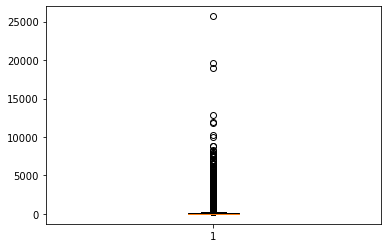

In [6]:
plt.boxplot(card_df.Amount)

## 데이터의 비대칭 해결

<AxesSubplot:xlabel='Amount', ylabel='Density'>

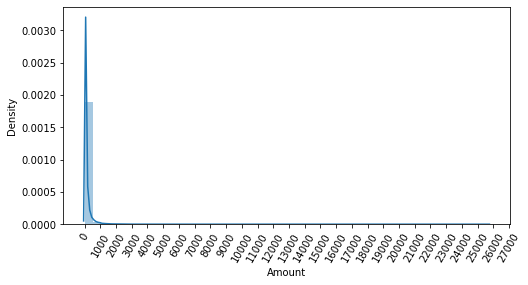

In [7]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [8]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 

In [28]:
df_bf_scaled = pd.concat([card_df['Time'],card_df['Amount']],axis=1) # standard scaler 쓰려면 2d로 넣으라고 해서 일단 만들었는데 time까지 정규분포를 만들어버리네요..ㅠㅠ
df_bf_scaled

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [29]:
scaler = StandardScaler()
scaler.fit(df_bf_scaled)
df_scaled = scaler.transform(df_bf_scaled)
df_scaled

array([[-1.99658302,  0.24496426],
       [-1.99658302, -0.34247454],
       [-1.99656197,  1.16068593],
       ...,
       [ 1.6419735 , -0.0818393 ],
       [ 1.6419735 , -0.31324853],
       [ 1.64205773,  0.51435531]])

In [42]:
pd.DataFrame(df_scaled).describe()

,0,1
count,2.848070e+05,2.848070e+05
mean,-1.050379e-14,3.202236e-16
std,1.000002e+00,1.000002e+00
min,-1.996583e+00,-3.532294e-01
25%,-8.552120e-01,-3.308401e-01
50%,-2.131453e-01,-2.652715e-01
75%,9.372174e-01,-4.471707e-02
max,1.642058e+00,1.023622e+02


In [65]:
card_df['Amount']=df_scaled[:,-1]

In [67]:
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


## train

In [68]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [77]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [78]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


# 모델 만들기

In [92]:

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred) #교차행렬
    accuracy = accuracy_score(y_test , pred) #정확도
    precision = precision_score(y_test , pred) #정밀도
    recall = recall_score(y_test , pred) #재현도
    f1 = f1_score(y_test,pred) #F1스코어
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

## XGBoost

In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
pred = xgb_clf.predict(X_test)

get_clf_eval(y_test,pred)
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.92721	validation_1-auc:0.90859
[1]	validation_0-auc:0.92722	validation_1-auc:0.90861
[2]	validation_0-auc:0.92722	validation_1-auc:0.90862
[3]	validation_0-auc:0.92721	validation_1-auc:0.91198
[4]	validation_0-auc:0.92721	validation_1-auc:0.91198
[5]	validation_0-auc:0.92866	validation_1-auc:0.91196
[6]	validation_0-auc:0.92866	validation_1-auc:0.91196
[7]	validation_0-auc:0.93294	validation_1-auc:0.91183
[8]	validation_0-auc:0.93291	validation_1-auc:0.91180
[9]	validation_0-auc:0.95476	validation_1-auc:0.92962
[10]	validation_0-auc:0.95900	validation_1-auc:0.92932
[11]	validation_0-auc:0.97143	validation_1-auc:0.95634
[12]	validation_0-auc:0.97161	validation_1-auc:0.95573
[13]	validation_0-auc:0.97154	validation_1-auc:0.95657
[14]	validation_0-auc:0.97154	validation_1-auc:0.95648
[15]	validation_0-auc:0.97823	validation_1-auc:0.95666
[16]	validation_0-auc:0.97966	validation_1-auc:0.95927
[17]	validation_0-auc:0.98005	validation_1-auc:0.95907
[18]	validation_0-au

[149]	validation_0-auc:1.00000	validation_1-auc:0.98156
[150]	validation_0-auc:1.00000	validation_1-auc:0.98185
[151]	validation_0-auc:1.00000	validation_1-auc:0.98182
[152]	validation_0-auc:1.00000	validation_1-auc:0.98197
[153]	validation_0-auc:1.00000	validation_1-auc:0.98193
[154]	validation_0-auc:1.00000	validation_1-auc:0.98192
[155]	validation_0-auc:1.00000	validation_1-auc:0.98185
[156]	validation_0-auc:1.00000	validation_1-auc:0.98171
오차 행렬
[[85289     6]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9496, 재현율: 0.7635, F1:0.8464
ROC AUC: 0.9839


In [99]:
params = {'learning_rate': [0.1, 0.2],
          'min_child_weight':[0.8, 1.5]}

gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_val)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.92721	validation_1-auc:0.90860
[1]	validation_0-auc:0.92721	validation_1-auc:0.90860
[2]	validation_0-auc:0.92722	validation_1-auc:0.90860
[3]	validation_0-auc:0.92722	validation_1-auc:0.90861
[4]	validation_0-auc:0.92722	validation_1-auc:0.90860
[5]	validation_0-auc:0.92722	validation_1-auc:0.90861
[6]	validation_0-auc:0.92722	validation_1-auc:0.90861
[7]	validation_0-auc:0.92722	validation_1-auc:0.90861
[8]	validation_0-auc:0.92722	validation_1-auc:0.90861
[9]	validation_0-auc:0.92722	validation_1-auc:0.90862
[10]	validation_0-auc:0.92721	validation_1-auc:0.91197
[11]	validation_0-auc:0.92721	validation_1-auc:0.91197
[12]	validation_0-auc:0.92865	validation_1-auc:0.91195
[13]	validation_0-auc:0.92865	validation_1-auc:0.91195
[14]	validation_0-auc:0.92865	validation_1-auc:0.91196
[15]	validation_0-auc:0.92865	validation_1-auc:0.91196
[16]	validation_0-auc:0.92865	validation_1-auc:0.91196
[17]	validation_0-auc:0.92865	validation_1-auc:0.91195
[18]	validation_0-au

[149]	validation_0-auc:0.99428	validation_1-auc:0.98234
[150]	validation_0-auc:0.99420	validation_1-auc:0.98240
[151]	validation_0-auc:0.99417	validation_1-auc:0.98216
[152]	validation_0-auc:0.99413	validation_1-auc:0.98221
[153]	validation_0-auc:0.99411	validation_1-auc:0.98231
[0]	validation_0-auc:0.92575	validation_1-auc:0.90860
[1]	validation_0-auc:0.92576	validation_1-auc:0.90860
[2]	validation_0-auc:0.92576	validation_1-auc:0.90860
[3]	validation_0-auc:0.92576	validation_1-auc:0.90861
[4]	validation_0-auc:0.92576	validation_1-auc:0.90861
[5]	validation_0-auc:0.92576	validation_1-auc:0.90861
[6]	validation_0-auc:0.92576	validation_1-auc:0.90861
[7]	validation_0-auc:0.92576	validation_1-auc:0.90861
[8]	validation_0-auc:0.92576	validation_1-auc:0.90861
[9]	validation_0-auc:0.92576	validation_1-auc:0.90862
[10]	validation_0-auc:0.92577	validation_1-auc:0.90862
[11]	validation_0-auc:0.92721	validation_1-auc:0.90861
[12]	validation_0-auc:0.92721	validation_1-auc:0.90861
[13]	validation

[33]	validation_0-auc:0.94900	validation_1-auc:0.92314
[34]	validation_0-auc:0.95186	validation_1-auc:0.92295
[35]	validation_0-auc:0.95329	validation_1-auc:0.92284
[36]	validation_0-auc:0.96659	validation_1-auc:0.94045
[37]	validation_0-auc:0.96672	validation_1-auc:0.94039
[38]	validation_0-auc:0.96674	validation_1-auc:0.94038
[39]	validation_0-auc:0.96679	validation_1-auc:0.94033
[40]	validation_0-auc:0.96682	validation_1-auc:0.94031
[41]	validation_0-auc:0.96673	validation_1-auc:0.94020
[42]	validation_0-auc:0.97075	validation_1-auc:0.94295
[43]	validation_0-auc:0.97075	validation_1-auc:0.94286
[44]	validation_0-auc:0.97721	validation_1-auc:0.95758
[45]	validation_0-auc:0.97725	validation_1-auc:0.95763
[46]	validation_0-auc:0.97723	validation_1-auc:0.95786
[47]	validation_0-auc:0.97719	validation_1-auc:0.95777
[48]	validation_0-auc:0.97720	validation_1-auc:0.95774
[49]	validation_0-auc:0.97726	validation_1-auc:0.95771
[50]	validation_0-auc:0.97728	validation_1-auc:0.95769
[51]	valid

[73]	validation_0-auc:0.99502	validation_1-auc:0.97299
[74]	validation_0-auc:0.99506	validation_1-auc:0.97248
[75]	validation_0-auc:0.99560	validation_1-auc:0.97456
[76]	validation_0-auc:0.99540	validation_1-auc:0.97328
[77]	validation_0-auc:0.99536	validation_1-auc:0.97281
[78]	validation_0-auc:0.99557	validation_1-auc:0.97292
[79]	validation_0-auc:0.99547	validation_1-auc:0.97231
[80]	validation_0-auc:0.99552	validation_1-auc:0.97309
[81]	validation_0-auc:0.99545	validation_1-auc:0.97389
[82]	validation_0-auc:0.99540	validation_1-auc:0.97438
[83]	validation_0-auc:0.99556	validation_1-auc:0.97535
[84]	validation_0-auc:0.99589	validation_1-auc:0.97479
[85]	validation_0-auc:0.99602	validation_1-auc:0.97573
[86]	validation_0-auc:0.99620	validation_1-auc:0.97598
[87]	validation_0-auc:0.99625	validation_1-auc:0.97599
[88]	validation_0-auc:0.99643	validation_1-auc:0.97707
[89]	validation_0-auc:0.99642	validation_1-auc:0.97734
[90]	validation_0-auc:0.99651	validation_1-auc:0.97761
[91]	valid

[220]	validation_0-auc:0.99637	validation_1-auc:0.98169
[221]	validation_0-auc:0.99638	validation_1-auc:0.98162
[222]	validation_0-auc:0.99640	validation_1-auc:0.98167
[223]	validation_0-auc:0.99639	validation_1-auc:0.98166
[224]	validation_0-auc:0.99638	validation_1-auc:0.98166
[225]	validation_0-auc:0.99640	validation_1-auc:0.98177
[226]	validation_0-auc:0.99641	validation_1-auc:0.98175
[227]	validation_0-auc:0.99639	validation_1-auc:0.98167
[228]	validation_0-auc:0.99637	validation_1-auc:0.98170
[229]	validation_0-auc:0.99635	validation_1-auc:0.98166
[0]	validation_0-auc:0.92576	validation_1-auc:0.90183
[1]	validation_0-auc:0.92576	validation_1-auc:0.90184
[2]	validation_0-auc:0.92576	validation_1-auc:0.90184
[3]	validation_0-auc:0.92721	validation_1-auc:0.90860
[4]	validation_0-auc:0.92721	validation_1-auc:0.90860
[5]	validation_0-auc:0.92721	validation_1-auc:0.90860
[6]	validation_0-auc:0.92720	validation_1-auc:0.91195
[7]	validation_0-auc:0.92720	validation_1-auc:0.91195
[8]	vali

[25]	validation_0-auc:0.93289	validation_1-auc:0.91178
[26]	validation_0-auc:0.93290	validation_1-auc:0.91178
[27]	validation_0-auc:0.93290	validation_1-auc:0.91178
[28]	validation_0-auc:0.95299	validation_1-auc:0.92959
[29]	validation_0-auc:0.95298	validation_1-auc:0.92954
[30]	validation_0-auc:0.95296	validation_1-auc:0.92951
[31]	validation_0-auc:0.95298	validation_1-auc:0.92951
[32]	validation_0-auc:0.95305	validation_1-auc:0.92950
[33]	validation_0-auc:0.97104	validation_1-auc:0.95549
[34]	validation_0-auc:0.97115	validation_1-auc:0.95550
[35]	validation_0-auc:0.97106	validation_1-auc:0.95547
[36]	validation_0-auc:0.97254	validation_1-auc:0.95550
[37]	validation_0-auc:0.97255	validation_1-auc:0.95546
[38]	validation_0-auc:0.97255	validation_1-auc:0.95569
[39]	validation_0-auc:0.97247	validation_1-auc:0.95549
[40]	validation_0-auc:0.97245	validation_1-auc:0.95546
[41]	validation_0-auc:0.97243	validation_1-auc:0.95540
[42]	validation_0-auc:0.97673	validation_1-auc:0.95769
[43]	valid

[45]	validation_0-auc:0.97674	validation_1-auc:0.95858
[46]	validation_0-auc:0.97789	validation_1-auc:0.95777
[47]	validation_0-auc:0.97788	validation_1-auc:0.95745
[48]	validation_0-auc:0.97788	validation_1-auc:0.95738
[49]	validation_0-auc:0.97886	validation_1-auc:0.95592
[50]	validation_0-auc:0.97883	validation_1-auc:0.95595
[51]	validation_0-auc:0.97874	validation_1-auc:0.95560
[52]	validation_0-auc:0.97871	validation_1-auc:0.95542
[53]	validation_0-auc:0.98008	validation_1-auc:0.95500
[54]	validation_0-auc:0.98136	validation_1-auc:0.95493
[55]	validation_0-auc:0.98257	validation_1-auc:0.95771
[56]	validation_0-auc:0.98262	validation_1-auc:0.95724
[57]	validation_0-auc:0.98284	validation_1-auc:0.95729
[58]	validation_0-auc:0.98288	validation_1-auc:0.95712
[59]	validation_0-auc:0.99074	validation_1-auc:0.96685
[60]	validation_0-auc:0.99055	validation_1-auc:0.96723
[61]	validation_0-auc:0.99111	validation_1-auc:0.96715
[62]	validation_0-auc:0.99155	validation_1-auc:0.96791
[63]	valid

[77]	validation_0-auc:0.99269	validation_1-auc:0.97531
[78]	validation_0-auc:0.99263	validation_1-auc:0.97495
[79]	validation_0-auc:0.99267	validation_1-auc:0.97484
[80]	validation_0-auc:0.99259	validation_1-auc:0.97402
[81]	validation_0-auc:0.99236	validation_1-auc:0.97530
[82]	validation_0-auc:0.99365	validation_1-auc:0.97632
[83]	validation_0-auc:0.99399	validation_1-auc:0.97636
[84]	validation_0-auc:0.99360	validation_1-auc:0.97529
[85]	validation_0-auc:0.99391	validation_1-auc:0.97524
[86]	validation_0-auc:0.99369	validation_1-auc:0.97454
[87]	validation_0-auc:0.99348	validation_1-auc:0.97379
[88]	validation_0-auc:0.99344	validation_1-auc:0.97324
[89]	validation_0-auc:0.99322	validation_1-auc:0.97291
[90]	validation_0-auc:0.99393	validation_1-auc:0.97238
[91]	validation_0-auc:0.99385	validation_1-auc:0.97261
[92]	validation_0-auc:0.99351	validation_1-auc:0.97243
[93]	validation_0-auc:0.99354	validation_1-auc:0.97344
[94]	validation_0-auc:0.99383	validation_1-auc:0.97358
[95]	valid

[52]	validation_0-auc:0.97779	validation_1-auc:0.95959
[53]	validation_0-auc:0.97926	validation_1-auc:0.95947
[54]	validation_0-auc:0.97929	validation_1-auc:0.95903
[55]	validation_0-auc:0.97922	validation_1-auc:0.95890
[56]	validation_0-auc:0.97929	validation_1-auc:0.95905
[57]	validation_0-auc:0.97943	validation_1-auc:0.95894
[58]	validation_0-auc:0.97962	validation_1-auc:0.95887
[59]	validation_0-auc:0.97965	validation_1-auc:0.95881
[60]	validation_0-auc:0.97967	validation_1-auc:0.95849
[61]	validation_0-auc:0.97977	validation_1-auc:0.95868
[62]	validation_0-auc:0.98523	validation_1-auc:0.96678
[63]	validation_0-auc:0.98634	validation_1-auc:0.96901
[64]	validation_0-auc:0.98656	validation_1-auc:0.96896
[65]	validation_0-auc:0.98682	validation_1-auc:0.96964
[66]	validation_0-auc:0.98682	validation_1-auc:0.96981
[67]	validation_0-auc:0.98918	validation_1-auc:0.96898
[68]	validation_0-auc:0.98908	validation_1-auc:0.96901
[69]	validation_0-auc:0.99103	validation_1-auc:0.97049
[70]	valid

[96]	validation_0-auc:0.99792	validation_1-auc:0.98050
[97]	validation_0-auc:0.99785	validation_1-auc:0.98001
[98]	validation_0-auc:0.99785	validation_1-auc:0.97947
[99]	validation_0-auc:0.99775	validation_1-auc:0.98035
[100]	validation_0-auc:0.99797	validation_1-auc:0.98048
[101]	validation_0-auc:0.99791	validation_1-auc:0.97999
[102]	validation_0-auc:0.99806	validation_1-auc:0.98008
[103]	validation_0-auc:0.99815	validation_1-auc:0.98057
[104]	validation_0-auc:0.99828	validation_1-auc:0.98066
[105]	validation_0-auc:0.99822	validation_1-auc:0.98029
[106]	validation_0-auc:0.99817	validation_1-auc:0.97981
[107]	validation_0-auc:0.99842	validation_1-auc:0.97947
[0]	validation_0-auc:0.92721	validation_1-auc:0.90860
[1]	validation_0-auc:0.92722	validation_1-auc:0.90860
[2]	validation_0-auc:0.92722	validation_1-auc:0.90861
[3]	validation_0-auc:0.92722	validation_1-auc:0.90861
[4]	validation_0-auc:0.92722	validation_1-auc:0.90861
[5]	validation_0-auc:0.92722	validation_1-auc:0.90862
[6]	vali

[42]	validation_0-auc:0.99642	validation_1-auc:0.97521
[43]	validation_0-auc:0.99606	validation_1-auc:0.97484
[44]	validation_0-auc:0.99587	validation_1-auc:0.97488
[45]	validation_0-auc:0.99579	validation_1-auc:0.97396
[46]	validation_0-auc:0.99569	validation_1-auc:0.97525
[47]	validation_0-auc:0.99559	validation_1-auc:0.97414
[48]	validation_0-auc:0.99542	validation_1-auc:0.97450
[49]	validation_0-auc:0.99547	validation_1-auc:0.97422
[50]	validation_0-auc:0.99531	validation_1-auc:0.97415
[51]	validation_0-auc:0.99533	validation_1-auc:0.97395
[52]	validation_0-auc:0.99539	validation_1-auc:0.97410
[53]	validation_0-auc:0.99565	validation_1-auc:0.97439
[54]	validation_0-auc:0.99560	validation_1-auc:0.97375
[55]	validation_0-auc:0.99564	validation_1-auc:0.97342
[56]	validation_0-auc:0.99554	validation_1-auc:0.97552
[57]	validation_0-auc:0.99550	validation_1-auc:0.97432
[58]	validation_0-auc:0.99534	validation_1-auc:0.97326
[59]	validation_0-auc:0.99532	validation_1-auc:0.97259
[60]	valid

[24]	validation_0-auc:0.96850	validation_1-auc:0.93393
[25]	validation_0-auc:0.97519	validation_1-auc:0.94864
[26]	validation_0-auc:0.97675	validation_1-auc:0.94925
[27]	validation_0-auc:0.97989	validation_1-auc:0.95598
[28]	validation_0-auc:0.98024	validation_1-auc:0.95587
[29]	validation_0-auc:0.98038	validation_1-auc:0.95631
[30]	validation_0-auc:0.98035	validation_1-auc:0.95599
[31]	validation_0-auc:0.98412	validation_1-auc:0.95732
[32]	validation_0-auc:0.98764	validation_1-auc:0.97146
[33]	validation_0-auc:0.99043	validation_1-auc:0.96932
[34]	validation_0-auc:0.99094	validation_1-auc:0.96994
[35]	validation_0-auc:0.99079	validation_1-auc:0.97005
[36]	validation_0-auc:0.99423	validation_1-auc:0.97144
[37]	validation_0-auc:0.99512	validation_1-auc:0.96994
[38]	validation_0-auc:0.99678	validation_1-auc:0.97448
[39]	validation_0-auc:0.99699	validation_1-auc:0.97249
[40]	validation_0-auc:0.99726	validation_1-auc:0.97213
[41]	validation_0-auc:0.99714	validation_1-auc:0.97264
[42]	valid

[55]	validation_0-auc:0.99639	validation_1-auc:0.97772
[56]	validation_0-auc:0.99653	validation_1-auc:0.97803
[57]	validation_0-auc:0.99664	validation_1-auc:0.97804
[58]	validation_0-auc:0.99656	validation_1-auc:0.97789
[59]	validation_0-auc:0.99640	validation_1-auc:0.97823
[60]	validation_0-auc:0.99637	validation_1-auc:0.97792
[61]	validation_0-auc:0.99626	validation_1-auc:0.97783
[62]	validation_0-auc:0.99613	validation_1-auc:0.97765
[63]	validation_0-auc:0.99653	validation_1-auc:0.97777
[64]	validation_0-auc:0.99653	validation_1-auc:0.97788
[65]	validation_0-auc:0.99686	validation_1-auc:0.97888
[66]	validation_0-auc:0.99691	validation_1-auc:0.97891
[67]	validation_0-auc:0.99668	validation_1-auc:0.97913
[68]	validation_0-auc:0.99677	validation_1-auc:0.97871
[69]	validation_0-auc:0.99674	validation_1-auc:0.97878
[70]	validation_0-auc:0.99679	validation_1-auc:0.97889
[71]	validation_0-auc:0.99680	validation_1-auc:0.97886
[72]	validation_0-auc:0.99693	validation_1-auc:0.97853
[73]	valid

[51]	validation_0-auc:0.99762	validation_1-auc:0.97301
[52]	validation_0-auc:0.99765	validation_1-auc:0.97364
[53]	validation_0-auc:0.99792	validation_1-auc:0.97300
[54]	validation_0-auc:0.99784	validation_1-auc:0.97274
[55]	validation_0-auc:0.99785	validation_1-auc:0.97311
[56]	validation_0-auc:0.99783	validation_1-auc:0.97393
[57]	validation_0-auc:0.99792	validation_1-auc:0.97325
[58]	validation_0-auc:0.99804	validation_1-auc:0.97306
[59]	validation_0-auc:0.99822	validation_1-auc:0.97266
[60]	validation_0-auc:0.99814	validation_1-auc:0.97293
[61]	validation_0-auc:0.99814	validation_1-auc:0.97259
[62]	validation_0-auc:0.99804	validation_1-auc:0.97392
[63]	validation_0-auc:0.99797	validation_1-auc:0.97370
[64]	validation_0-auc:0.99805	validation_1-auc:0.97425
[65]	validation_0-auc:0.99809	validation_1-auc:0.97413
[66]	validation_0-auc:0.99800	validation_1-auc:0.97477
[67]	validation_0-auc:0.99792	validation_1-auc:0.97519
[68]	validation_0-auc:0.99782	validation_1-auc:0.97571
[69]	valid

[51]	validation_0-auc:0.99555	validation_1-auc:0.97256
[52]	validation_0-auc:0.99538	validation_1-auc:0.97202
[53]	validation_0-auc:0.99528	validation_1-auc:0.97297
[54]	validation_0-auc:0.99509	validation_1-auc:0.97359
[55]	validation_0-auc:0.99521	validation_1-auc:0.97223
[56]	validation_0-auc:0.99552	validation_1-auc:0.97042
[57]	validation_0-auc:0.99531	validation_1-auc:0.97048
[58]	validation_0-auc:0.99526	validation_1-auc:0.96982
[59]	validation_0-auc:0.99535	validation_1-auc:0.97042
[60]	validation_0-auc:0.99527	validation_1-auc:0.96957
[61]	validation_0-auc:0.99533	validation_1-auc:0.96896
[62]	validation_0-auc:0.99538	validation_1-auc:0.96734
[63]	validation_0-auc:0.99517	validation_1-auc:0.96841
[64]	validation_0-auc:0.99509	validation_1-auc:0.96799
[65]	validation_0-auc:0.99560	validation_1-auc:0.96743
[66]	validation_0-auc:0.99538	validation_1-auc:0.96845
[67]	validation_0-auc:0.99541	validation_1-auc:0.96817
[68]	validation_0-auc:0.99513	validation_1-auc:0.96802
[69]	valid

[51]	validation_0-auc:0.97974	validation_1-auc:0.96214
[52]	validation_0-auc:0.97983	validation_1-auc:0.96251
[53]	validation_0-auc:0.98232	validation_1-auc:0.96212
[54]	validation_0-auc:0.98223	validation_1-auc:0.96183
[55]	validation_0-auc:0.98853	validation_1-auc:0.97110
[56]	validation_0-auc:0.98862	validation_1-auc:0.97109
[57]	validation_0-auc:0.99007	validation_1-auc:0.97092
[58]	validation_0-auc:0.99022	validation_1-auc:0.97091
[59]	validation_0-auc:0.99035	validation_1-auc:0.97086
[60]	validation_0-auc:0.99285	validation_1-auc:0.97053
[61]	validation_0-auc:0.99316	validation_1-auc:0.96992
[62]	validation_0-auc:0.99407	validation_1-auc:0.96971
[63]	validation_0-auc:0.99406	validation_1-auc:0.96950
[64]	validation_0-auc:0.99471	validation_1-auc:0.97089
[65]	validation_0-auc:0.99533	validation_1-auc:0.97408
[66]	validation_0-auc:0.99547	validation_1-auc:0.97430
[67]	validation_0-auc:0.99545	validation_1-auc:0.97406
[68]	validation_0-auc:0.99584	validation_1-auc:0.97435
[69]	valid

NameError: name 'X_val' is not defined

## Lightgbm

In [98]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV


lgbm_clf = LGBMClassifier(n_estimators=200,boost_from_average=True)
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
pred = lgbm_clf.predict(X_test)

get_clf_eval(y_test,pred)

params = {'num_leaves': [10, 20 ],
          'max_depth':[30, 60],
          'min_child_samples':[30, 50],
          'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.965324	training's binary_logloss: 0.0104315	valid_1's auc: 0.897526	valid_1's binary_logloss: 0.0130438
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.332888	training's binary_logloss: 0.040402	valid_1's auc: 0.320938	valid_1's binary_logloss: 0.0402989
[3]	training's auc: 0.919936	training's binary_logloss: 0.0122028	valid_1's auc: 0.827356	valid_1's binary_logloss: 0.0196298
[4]	training's auc: 0.871363	training's binary_logloss: 0.0149784	valid_1's auc: 0.782004	valid_1's binary_logloss: 0.0220136
[5]	training's auc: 0.883095	training's binary_logloss: 0.0167001	valid_1's auc: 0.78272	valid_1's binary_logloss: 0.0249562
[6]	training's auc: 0.867403	training's binary_logloss: 0.0174481	valid_1's auc: 0.777092	valid_1's binary_logloss: 0.0252917
[7]	training's auc: 0.870277	training's binary_logloss: 0.0197444	valid_1's auc: 0.776982	valid_1's binary_logloss: 0.0283525
[8]	training's auc: 0.815332	training's binary_logloss: 0.

[71]	training's auc: 0.861758	training's binary_logloss: 0.0354144	valid_1's auc: 0.748983	valid_1's binary_logloss: 0.0741938
[72]	training's auc: 0.869241	training's binary_logloss: 0.0417779	valid_1's auc: 0.749849	valid_1's binary_logloss: 0.0771991
[73]	training's auc: 0.879683	training's binary_logloss: 0.0272764	valid_1's auc: 0.76248	valid_1's binary_logloss: 0.0633417
[74]	training's auc: 0.874603	training's binary_logloss: 0.0310906	valid_1's auc: 0.762906	valid_1's binary_logloss: 0.0703035
[75]	training's auc: 0.877546	training's binary_logloss: 0.320176	valid_1's auc: 0.767457	valid_1's binary_logloss: 0.33841
[76]	training's auc: 0.709796	training's binary_logloss: 0.0856352	valid_1's auc: 0.630468	valid_1's binary_logloss: 0.118131
[77]	training's auc: 0.736035	training's binary_logloss: 0.10842	valid_1's auc: 0.657558	valid_1's binary_logloss: 0.14751
[78]	training's auc: 0.738744	training's binary_logloss: 0.130404	valid_1's auc: 0.658198	valid_1's binary_logloss: 0.16

[1]	valid_0's auc: 0.927221	valid_0's binary_logloss: 0.0114822	valid_1's auc: 0.915394	valid_1's binary_logloss: 0.0120811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.323106	valid_0's binary_logloss: 0.0396943	valid_1's auc: 0.294416	valid_1's binary_logloss: 0.0395364
[3]	valid_0's auc: 0.889694	valid_0's binary_logloss: 0.0178669	valid_1's auc: 0.82113	valid_1's binary_logloss: 0.0210227
[4]	valid_0's auc: 0.806196	valid_0's binary_logloss: 0.0182117	valid_1's auc: 0.738914	valid_1's binary_logloss: 0.0227675
[5]	valid_0's auc: 0.807524	valid_0's binary_logloss: 0.0205287	valid_1's auc: 0.738549	valid_1's binary_logloss: 0.0255264
[6]	valid_0's auc: 0.804441	valid_0's binary_logloss: 0.0209852	valid_1's auc: 0.738299	valid_1's binary_logloss: 0.0254639
[7]	valid_0's auc: 0.801476	valid_0's binary_logloss: 0.0217626	valid_1's auc: 0.751762	valid_1's binary_logloss: 0.025076
[8]	valid_0's auc: 0.801433	valid_0's binary_logloss: 0.0266847	valid_1's

[19]	valid_0's auc: 0.849888	valid_0's binary_logloss: 0.0290005	valid_1's auc: 0.746902	valid_1's binary_logloss: 0.0363511
[20]	valid_0's auc: 0.850222	valid_0's binary_logloss: 0.0275763	valid_1's auc: 0.754068	valid_1's binary_logloss: 0.0333831
[21]	valid_0's auc: 0.856056	valid_0's binary_logloss: 0.0303214	valid_1's auc: 0.754258	valid_1's binary_logloss: 0.0360137
[22]	valid_0's auc: 0.82724	valid_0's binary_logloss: 0.0276179	valid_1's auc: 0.720827	valid_1's binary_logloss: 0.0348917
[23]	valid_0's auc: 0.80413	valid_0's binary_logloss: 0.0301129	valid_1's auc: 0.734032	valid_1's binary_logloss: 0.0364318
[24]	valid_0's auc: 0.56172	valid_0's binary_logloss: 0.0442154	valid_1's auc: 0.519452	valid_1's binary_logloss: 0.0463755
[25]	valid_0's auc: 0.878869	valid_0's binary_logloss: 0.0722541	valid_1's auc: 0.801014	valid_1's binary_logloss: 0.0769047
[26]	valid_0's auc: 0.861628	valid_0's binary_logloss: 0.0686505	valid_1's auc: 0.774205	valid_1's binary_logloss: 0.0776801
[27

[20]	valid_0's auc: 0.876894	valid_0's binary_logloss: 0.0233082	valid_1's auc: 0.784253	valid_1's binary_logloss: 0.0334233
[21]	valid_0's auc: 0.842381	valid_0's binary_logloss: 0.0265439	valid_1's auc: 0.750788	valid_1's binary_logloss: 0.0411366
[22]	valid_0's auc: 0.906249	valid_0's binary_logloss: 0.0228696	valid_1's auc: 0.804722	valid_1's binary_logloss: 0.0374598
[23]	valid_0's auc: 0.883377	valid_0's binary_logloss: 0.0243637	valid_1's auc: 0.771354	valid_1's binary_logloss: 0.039406
[24]	valid_0's auc: 0.86897	valid_0's binary_logloss: 0.0219417	valid_1's auc: 0.764709	valid_1's binary_logloss: 0.0351817
[25]	valid_0's auc: 0.90386	valid_0's binary_logloss: 0.0273416	valid_1's auc: 0.791836	valid_1's binary_logloss: 0.0379216
[26]	valid_0's auc: 0.831481	valid_0's binary_logloss: 0.0263829	valid_1's auc: 0.744667	valid_1's binary_logloss: 0.0378045
[27]	valid_0's auc: 0.877742	valid_0's binary_logloss: 0.0525983	valid_1's auc: 0.784925	valid_1's binary_logloss: 0.0663966
[28

[21]	valid_0's auc: 0.524288	valid_0's binary_logloss: 0.0622128	valid_1's auc: 0.484359	valid_1's binary_logloss: 0.0686527
[22]	valid_0's auc: 0.771002	valid_0's binary_logloss: 0.0391567	valid_1's auc: 0.707058	valid_1's binary_logloss: 0.0451925
[23]	valid_0's auc: 0.747458	valid_0's binary_logloss: 0.070396	valid_1's auc: 0.686422	valid_1's binary_logloss: 0.074545
[24]	valid_0's auc: 0.738833	valid_0's binary_logloss: 0.0802627	valid_1's auc: 0.67977	valid_1's binary_logloss: 0.0876377
[25]	valid_0's auc: 0.716267	valid_0's binary_logloss: 0.0300962	valid_1's auc: 0.666988	valid_1's binary_logloss: 0.0339621
[26]	valid_0's auc: 0.648722	valid_0's binary_logloss: 0.0464753	valid_1's auc: 0.613382	valid_1's binary_logloss: 0.0486824
[27]	valid_0's auc: 0.816033	valid_0's binary_logloss: 0.0424888	valid_1's auc: 0.707496	valid_1's binary_logloss: 0.0478666
[28]	valid_0's auc: 0.481791	valid_0's binary_logloss: 0.0438668	valid_1's auc: 0.400082	valid_1's binary_logloss: 0.0481821
[29

[28]	valid_0's auc: 0.88978	valid_0's binary_logloss: 0.0709853	valid_1's auc: 0.814526	valid_1's binary_logloss: 0.073981
[29]	valid_0's auc: 0.441622	valid_0's binary_logloss: 0.0484442	valid_1's auc: 0.425037	valid_1's binary_logloss: 0.0494568
[30]	valid_0's auc: 0.597851	valid_0's binary_logloss: 0.0979398	valid_1's auc: 0.599464	valid_1's binary_logloss: 0.104015
[31]	valid_0's auc: 0.437719	valid_0's binary_logloss: 0.0580375	valid_1's auc: 0.422407	valid_1's binary_logloss: 0.0614713
Early stopping, best iteration is:
[1]	valid_0's auc: 0.927215	valid_0's binary_logloss: 0.0111982	valid_1's auc: 0.901874	valid_1's binary_logloss: 0.0123296
[1]	valid_0's auc: 0.953395	valid_0's binary_logloss: 0.0124422	valid_1's auc: 0.897837	valid_1's binary_logloss: 0.0138609
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.129007	valid_0's binary_logloss: 0.0535505	valid_1's auc: 0.139174	valid_1's binary_logloss: 0.0520308
[3]	valid_0's auc: 0.867079	valid_0

[1]	valid_0's auc: 0.955796	valid_0's binary_logloss: 0.0120777	valid_1's auc: 0.8729	valid_1's binary_logloss: 0.0142423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.121762	valid_0's binary_logloss: 0.0533788	valid_1's auc: 0.109345	valid_1's binary_logloss: 0.0531101
[3]	valid_0's auc: 0.863168	valid_0's binary_logloss: 0.0214733	valid_1's auc: 0.731934	valid_1's binary_logloss: 0.0272575
[4]	valid_0's auc: 0.857988	valid_0's binary_logloss: 0.0187724	valid_1's auc: 0.725952	valid_1's binary_logloss: 0.0254254
[5]	valid_0's auc: 0.858024	valid_0's binary_logloss: 0.0225456	valid_1's auc: 0.726053	valid_1's binary_logloss: 0.0269033
[6]	valid_0's auc: 0.855134	valid_0's binary_logloss: 0.0213701	valid_1's auc: 0.726122	valid_1's binary_logloss: 0.0267082
[7]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.0234665	valid_1's auc: 0.733477	valid_1's binary_logloss: 0.028009
[8]	valid_0's auc: 0.848503	valid_0's binary_logloss: 0.02669	valid_1's au

[14]	valid_0's auc: 0.843533	valid_0's binary_logloss: 0.0193313	valid_1's auc: 0.810714	valid_1's binary_logloss: 0.0235984
[15]	valid_0's auc: 0.944094	valid_0's binary_logloss: 0.0217115	valid_1's auc: 0.871349	valid_1's binary_logloss: 0.0287597
[16]	valid_0's auc: 0.717488	valid_0's binary_logloss: 0.0253711	valid_1's auc: 0.661691	valid_1's binary_logloss: 0.0302907
[17]	valid_0's auc: 0.947233	valid_0's binary_logloss: 0.0189774	valid_1's auc: 0.870656	valid_1's binary_logloss: 0.0252409
[18]	valid_0's auc: 0.837486	valid_0's binary_logloss: 0.0211108	valid_1's auc: 0.798068	valid_1's binary_logloss: 0.0242175
[19]	valid_0's auc: 0.942012	valid_0's binary_logloss: 0.0221383	valid_1's auc: 0.858815	valid_1's binary_logloss: 0.0292694
[20]	valid_0's auc: 0.73017	valid_0's binary_logloss: 0.0261842	valid_1's auc: 0.676737	valid_1's binary_logloss: 0.0327915
[21]	valid_0's auc: 0.947809	valid_0's binary_logloss: 0.0252243	valid_1's auc: 0.858824	valid_1's binary_logloss: 0.0367288
[

[17]	valid_0's auc: 0.860643	valid_0's binary_logloss: 0.0144242	valid_1's auc: 0.802764	valid_1's binary_logloss: 0.0154073
[18]	valid_0's auc: 0.855056	valid_0's binary_logloss: 0.0143564	valid_1's auc: 0.797598	valid_1's binary_logloss: 0.0165721
[19]	valid_0's auc: 0.857266	valid_0's binary_logloss: 0.0141581	valid_1's auc: 0.796771	valid_1's binary_logloss: 0.0164415
[20]	valid_0's auc: 0.864442	valid_0's binary_logloss: 0.0164267	valid_1's auc: 0.803423	valid_1's binary_logloss: 0.0191352
[21]	valid_0's auc: 0.867409	valid_0's binary_logloss: 0.0156371	valid_1's auc: 0.8037	valid_1's binary_logloss: 0.0178273
[22]	valid_0's auc: 0.869609	valid_0's binary_logloss: 0.0215003	valid_1's auc: 0.823622	valid_1's binary_logloss: 0.0262783
[23]	valid_0's auc: 0.872576	valid_0's binary_logloss: 0.0184711	valid_1's auc: 0.823823	valid_1's binary_logloss: 0.0233928
[24]	valid_0's auc: 0.872017	valid_0's binary_logloss: 0.0250494	valid_1's auc: 0.824756	valid_1's binary_logloss: 0.0298887
[2

[29]	valid_0's auc: 0.840018	valid_0's binary_logloss: 0.0377655	valid_1's auc: 0.717681	valid_1's binary_logloss: 0.0533949
[30]	valid_0's auc: 0.83745	valid_0's binary_logloss: 0.037548	valid_1's auc: 0.718009	valid_1's binary_logloss: 0.0550273
[31]	valid_0's auc: 0.80116	valid_0's binary_logloss: 0.0389283	valid_1's auc: 0.677735	valid_1's binary_logloss: 0.0517893
Early stopping, best iteration is:
[1]	valid_0's auc: 0.951226	valid_0's binary_logloss: 0.0149839	valid_1's auc: 0.877538	valid_1's binary_logloss: 0.0173163
[1]	valid_0's auc: 0.955607	valid_0's binary_logloss: 0.0111171	valid_1's auc: 0.902568	valid_1's binary_logloss: 0.0124724
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.153276	valid_0's binary_logloss: 0.0513781	valid_1's auc: 0.14525	valid_1's binary_logloss: 0.0488877
[3]	valid_0's auc: 0.872241	valid_0's binary_logloss: 0.0225876	valid_1's auc: 0.738537	valid_1's binary_logloss: 0.0269841
[4]	valid_0's auc: 0.875144	valid_0's

[1]	valid_0's auc: 0.93279	valid_0's binary_logloss: 0.0138385	valid_1's auc: 0.911677	valid_1's binary_logloss: 0.0157442
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.218993	valid_0's binary_logloss: 0.045848	valid_1's auc: 0.239383	valid_1's binary_logloss: 0.0439105
[3]	valid_0's auc: 0.939371	valid_0's binary_logloss: 0.0192442	valid_1's auc: 0.907424	valid_1's binary_logloss: 0.0218434
[4]	valid_0's auc: 0.898632	valid_0's binary_logloss: 0.0145318	valid_1's auc: 0.859588	valid_1's binary_logloss: 0.0166804
[5]	valid_0's auc: 0.927607	valid_0's binary_logloss: 0.0169574	valid_1's auc: 0.879746	valid_1's binary_logloss: 0.0195906
[6]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.0151054	valid_1's auc: 0.846093	valid_1's binary_logloss: 0.0183914
[7]	valid_0's auc: 0.904404	valid_0's binary_logloss: 0.0155524	valid_1's auc: 0.859437	valid_1's binary_logloss: 0.0183798
[8]	valid_0's auc: 0.794279	valid_0's binary_logloss: 0.0193032	valid_1's 

[20]	valid_0's auc: 0.787997	valid_0's binary_logloss: 0.0181523	valid_1's auc: 0.737462	valid_1's binary_logloss: 0.0253322
[21]	valid_0's auc: 0.883652	valid_0's binary_logloss: 0.0227836	valid_1's auc: 0.804837	valid_1's binary_logloss: 0.0323086
[22]	valid_0's auc: 0.834507	valid_0's binary_logloss: 0.0189613	valid_1's auc: 0.76461	valid_1's binary_logloss: 0.0273805
[23]	valid_0's auc: 0.834708	valid_0's binary_logloss: 0.026036	valid_1's auc: 0.764789	valid_1's binary_logloss: 0.0346233
[24]	valid_0's auc: 0.834785	valid_0's binary_logloss: 0.0426794	valid_1's auc: 0.764935	valid_1's binary_logloss: 0.0489739
[25]	valid_0's auc: 0.843705	valid_0's binary_logloss: 0.0260174	valid_1's auc: 0.731661	valid_1's binary_logloss: 0.0368453
[26]	valid_0's auc: 0.792009	valid_0's binary_logloss: 0.0282606	valid_1's auc: 0.705157	valid_1's binary_logloss: 0.0374554
[27]	valid_0's auc: 0.849767	valid_0's binary_logloss: 0.020664	valid_1's auc: 0.739021	valid_1's binary_logloss: 0.0308804
[28

[1]	valid_0's auc: 0.93279	valid_0's binary_logloss: 0.0138385	valid_1's auc: 0.911677	valid_1's binary_logloss: 0.0157442
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.218993	valid_0's binary_logloss: 0.045848	valid_1's auc: 0.239383	valid_1's binary_logloss: 0.0439105
[3]	valid_0's auc: 0.939371	valid_0's binary_logloss: 0.0192442	valid_1's auc: 0.907424	valid_1's binary_logloss: 0.0218434
[4]	valid_0's auc: 0.898632	valid_0's binary_logloss: 0.0145318	valid_1's auc: 0.859588	valid_1's binary_logloss: 0.0166804
[5]	valid_0's auc: 0.927607	valid_0's binary_logloss: 0.0169574	valid_1's auc: 0.879746	valid_1's binary_logloss: 0.0195906
[6]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.0151054	valid_1's auc: 0.846093	valid_1's binary_logloss: 0.0183914
[7]	valid_0's auc: 0.904404	valid_0's binary_logloss: 0.0155524	valid_1's auc: 0.859437	valid_1's binary_logloss: 0.0183798
[8]	valid_0's auc: 0.794279	valid_0's binary_logloss: 0.0193032	valid_1's 

[20]	valid_0's auc: 0.787997	valid_0's binary_logloss: 0.0181523	valid_1's auc: 0.737462	valid_1's binary_logloss: 0.0253322
[21]	valid_0's auc: 0.883652	valid_0's binary_logloss: 0.0227836	valid_1's auc: 0.804837	valid_1's binary_logloss: 0.0323086
[22]	valid_0's auc: 0.834507	valid_0's binary_logloss: 0.0189613	valid_1's auc: 0.76461	valid_1's binary_logloss: 0.0273805
[23]	valid_0's auc: 0.834708	valid_0's binary_logloss: 0.026036	valid_1's auc: 0.764789	valid_1's binary_logloss: 0.0346233
[24]	valid_0's auc: 0.834785	valid_0's binary_logloss: 0.0426794	valid_1's auc: 0.764935	valid_1's binary_logloss: 0.0489739
[25]	valid_0's auc: 0.843705	valid_0's binary_logloss: 0.0260174	valid_1's auc: 0.731661	valid_1's binary_logloss: 0.0368453
[26]	valid_0's auc: 0.792009	valid_0's binary_logloss: 0.0282606	valid_1's auc: 0.705157	valid_1's binary_logloss: 0.0374554
[27]	valid_0's auc: 0.849767	valid_0's binary_logloss: 0.020664	valid_1's auc: 0.739021	valid_1's binary_logloss: 0.0308804
[28

[31]	valid_0's auc: 0.731068	valid_0's binary_logloss: 0.0429774	valid_1's auc: 0.63684	valid_1's binary_logloss: 0.0610762
Early stopping, best iteration is:
[1]	valid_0's auc: 0.96197	valid_0's binary_logloss: 0.0145769	valid_1's auc: 0.917825	valid_1's binary_logloss: 0.0159224
[1]	valid_0's auc: 0.957322	valid_0's binary_logloss: 0.013687	valid_1's auc: 0.892589	valid_1's binary_logloss: 0.0158055
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.136659	valid_0's binary_logloss: 0.0485277	valid_1's auc: 0.125811	valid_1's binary_logloss: 0.0472336
[3]	valid_0's auc: 0.868749	valid_0's binary_logloss: 0.025893	valid_1's auc: 0.769302	valid_1's binary_logloss: 0.0307089
[4]	valid_0's auc: 0.804877	valid_0's binary_logloss: 0.0231775	valid_1's auc: 0.681816	valid_1's binary_logloss: 0.0312147
[5]	valid_0's auc: 0.804874	valid_0's binary_logloss: 0.0259825	valid_1's auc: 0.681903	valid_1's binary_logloss: 0.0355
[6]	valid_0's auc: 0.804603	valid_0's bina

[1]	valid_0's auc: 0.953948	valid_0's binary_logloss: 0.0147079	valid_1's auc: 0.890677	valid_1's binary_logloss: 0.0170335
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.129438	valid_0's binary_logloss: 0.0542261	valid_1's auc: 0.125295	valid_1's binary_logloss: 0.05243
[3]	valid_0's auc: 0.292138	valid_0's binary_logloss: 0.0539088	valid_1's auc: 0.27827	valid_1's binary_logloss: 0.0504537
[4]	valid_0's auc: 0.849827	valid_0's binary_logloss: 0.0223989	valid_1's auc: 0.809428	valid_1's binary_logloss: 0.0229133
[5]	valid_0's auc: 0.844038	valid_0's binary_logloss: 0.0227608	valid_1's auc: 0.802819	valid_1's binary_logloss: 0.0237906
[6]	valid_0's auc: 0.844042	valid_0's binary_logloss: 0.0298843	valid_1's auc: 0.80279	valid_1's binary_logloss: 0.0302352
[7]	valid_0's auc: 0.840127	valid_0's binary_logloss: 0.0249999	valid_1's auc: 0.78292	valid_1's binary_logloss: 0.0283167
[8]	valid_0's auc: 0.842141	valid_0's binary_logloss: 0.0227622	valid_1's au

[15]	valid_0's auc: 0.850603	valid_0's binary_logloss: 0.0173336	valid_1's auc: 0.71522	valid_1's binary_logloss: 0.0282262
[16]	valid_0's auc: 0.783916	valid_0's binary_logloss: 0.0186462	valid_1's auc: 0.668781	valid_1's binary_logloss: 0.0290479
[17]	valid_0's auc: 0.853544	valid_0's binary_logloss: 0.0189565	valid_1's auc: 0.722781	valid_1's binary_logloss: 0.0307964
[18]	valid_0's auc: 0.731422	valid_0's binary_logloss: 0.0231637	valid_1's auc: 0.652978	valid_1's binary_logloss: 0.0309182
[19]	valid_0's auc: 0.870436	valid_0's binary_logloss: 0.0332053	valid_1's auc: 0.76076	valid_1's binary_logloss: 0.0471792
[20]	valid_0's auc: 0.711008	valid_0's binary_logloss: 0.0271269	valid_1's auc: 0.611782	valid_1's binary_logloss: 0.0368355
[21]	valid_0's auc: 0.705689	valid_0's binary_logloss: 0.0282015	valid_1's auc: 0.607611	valid_1's binary_logloss: 0.0365457
[22]	valid_0's auc: 0.80487	valid_0's binary_logloss: 0.0246974	valid_1's auc: 0.707445	valid_1's binary_logloss: 0.0333212
[23

[18]	valid_0's auc: 0.698167	valid_0's binary_logloss: 0.0295601	valid_1's auc: 0.649852	valid_1's binary_logloss: 0.0381034
[19]	valid_0's auc: 0.785107	valid_0's binary_logloss: 0.031361	valid_1's auc: 0.703742	valid_1's binary_logloss: 0.0439605
[20]	valid_0's auc: 0.788084	valid_0's binary_logloss: 0.0261702	valid_1's auc: 0.710819	valid_1's binary_logloss: 0.0385878
[21]	valid_0's auc: 0.776605	valid_0's binary_logloss: 0.0267567	valid_1's auc: 0.711071	valid_1's binary_logloss: 0.0389716
[22]	valid_0's auc: 0.774005	valid_0's binary_logloss: 0.0269645	valid_1's auc: 0.711324	valid_1's binary_logloss: 0.0384833
[23]	valid_0's auc: 0.779763	valid_0's binary_logloss: 0.0255674	valid_1's auc: 0.711361	valid_1's binary_logloss: 0.037997
[24]	valid_0's auc: 0.7833	valid_0's binary_logloss: 0.0252561	valid_1's auc: 0.712533	valid_1's binary_logloss: 0.0385446
[25]	valid_0's auc: 0.786078	valid_0's binary_logloss: 0.0247909	valid_1's auc: 0.698826	valid_1's binary_logloss: 0.0386861
[26]

[28]	valid_0's auc: 0.933074	valid_0's binary_logloss: 0.0154438	valid_1's auc: 0.818325	valid_1's binary_logloss: 0.023835
[29]	valid_0's auc: 0.941288	valid_0's binary_logloss: 0.0145278	valid_1's auc: 0.843489	valid_1's binary_logloss: 0.0233042
[30]	valid_0's auc: 0.939174	valid_0's binary_logloss: 0.0144416	valid_1's auc: 0.846853	valid_1's binary_logloss: 0.0231426
[31]	valid_0's auc: 0.938974	valid_0's binary_logloss: 0.0163401	valid_1's auc: 0.849166	valid_1's binary_logloss: 0.0257545
Early stopping, best iteration is:
[1]	valid_0's auc: 0.962572	valid_0's binary_logloss: 0.013564	valid_1's auc: 0.935202	valid_1's binary_logloss: 0.0140676
[1]	valid_0's auc: 0.927205	valid_0's binary_logloss: 0.0122619	valid_1's auc: 0.915361	valid_1's binary_logloss: 0.013345
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.116957	valid_0's binary_logloss: 0.0535297	valid_1's auc: 0.151384	valid_1's binary_logloss: 0.0513853
[3]	valid_0's auc: 0.906067	valid_0

[30]	valid_0's auc: 0.656957	valid_0's binary_logloss: 0.0314837	valid_1's auc: 0.584337	valid_1's binary_logloss: 0.0372661
[31]	valid_0's auc: 0.65683	valid_0's binary_logloss: 0.0343515	valid_1's auc: 0.597465	valid_1's binary_logloss: 0.0391537
Early stopping, best iteration is:
[1]	valid_0's auc: 0.927221	valid_0's binary_logloss: 0.0114822	valid_1's auc: 0.915394	valid_1's binary_logloss: 0.0120811
[1]	valid_0's auc: 0.927223	valid_0's binary_logloss: 0.0118587	valid_1's auc: 0.901864	valid_1's binary_logloss: 0.0139172
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.180431	valid_0's binary_logloss: 0.0488898	valid_1's auc: 0.165763	valid_1's binary_logloss: 0.0503955
[3]	valid_0's auc: 0.811447	valid_0's binary_logloss: 0.0229564	valid_1's auc: 0.720098	valid_1's binary_logloss: 0.0305094
[4]	valid_0's auc: 0.80297	valid_0's binary_logloss: 0.0220781	valid_1's auc: 0.713683	valid_1's binary_logloss: 0.0267935
[5]	valid_0's auc: 0.829084	valid_0'

[1]	valid_0's auc: 0.927215	valid_0's binary_logloss: 0.0111982	valid_1's auc: 0.901874	valid_1's binary_logloss: 0.0123296
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.152277	valid_0's binary_logloss: 0.0512504	valid_1's auc: 0.198858	valid_1's binary_logloss: 0.0480019
[3]	valid_0's auc: 0.76092	valid_0's binary_logloss: 0.0289248	valid_1's auc: 0.686807	valid_1's binary_logloss: 0.0312431
[4]	valid_0's auc: 0.894704	valid_0's binary_logloss: 0.0173677	valid_1's auc: 0.835517	valid_1's binary_logloss: 0.0192703
[5]	valid_0's auc: 0.886164	valid_0's binary_logloss: 0.0222811	valid_1's auc: 0.775011	valid_1's binary_logloss: 0.0275014
[6]	valid_0's auc: 0.880372	valid_0's binary_logloss: 0.0233649	valid_1's auc: 0.76825	valid_1's binary_logloss: 0.0297794
[7]	valid_0's auc: 0.682904	valid_0's binary_logloss: 0.0297429	valid_1's auc: 0.673831	valid_1's binary_logloss: 0.027183
[8]	valid_0's auc: 0.880683	valid_0's binary_logloss: 0.0210683	valid_1's 

[19]	valid_0's auc: 0.808795	valid_0's binary_logloss: 0.0331689	valid_1's auc: 0.727069	valid_1's binary_logloss: 0.0424279
[20]	valid_0's auc: 0.77703	valid_0's binary_logloss: 0.03314	valid_1's auc: 0.686809	valid_1's binary_logloss: 0.0418914
[21]	valid_0's auc: 0.78008	valid_0's binary_logloss: 0.0422756	valid_1's auc: 0.700401	valid_1's binary_logloss: 0.0516878
[22]	valid_0's auc: 0.814788	valid_0's binary_logloss: 0.0369748	valid_1's auc: 0.740796	valid_1's binary_logloss: 0.0476848
[23]	valid_0's auc: 0.736339	valid_0's binary_logloss: 0.0298297	valid_1's auc: 0.672962	valid_1's binary_logloss: 0.0383276
[24]	valid_0's auc: 0.770155	valid_0's binary_logloss: 0.0963062	valid_1's auc: 0.689519	valid_1's binary_logloss: 0.121992
[25]	valid_0's auc: 0.633097	valid_0's binary_logloss: 0.0346417	valid_1's auc: 0.549766	valid_1's binary_logloss: 0.0423863
[26]	valid_0's auc: 0.639172	valid_0's binary_logloss: 0.0346846	valid_1's auc: 0.550227	valid_1's binary_logloss: 0.0421701
[27]	

[1]	valid_0's auc: 0.927215	valid_0's binary_logloss: 0.0111982	valid_1's auc: 0.901874	valid_1's binary_logloss: 0.0123296
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.152277	valid_0's binary_logloss: 0.0512504	valid_1's auc: 0.198858	valid_1's binary_logloss: 0.0480019
[3]	valid_0's auc: 0.76092	valid_0's binary_logloss: 0.0289248	valid_1's auc: 0.686807	valid_1's binary_logloss: 0.0312431
[4]	valid_0's auc: 0.894704	valid_0's binary_logloss: 0.0173677	valid_1's auc: 0.835517	valid_1's binary_logloss: 0.0192703
[5]	valid_0's auc: 0.886164	valid_0's binary_logloss: 0.0222811	valid_1's auc: 0.775011	valid_1's binary_logloss: 0.0275014
[6]	valid_0's auc: 0.880372	valid_0's binary_logloss: 0.0233649	valid_1's auc: 0.76825	valid_1's binary_logloss: 0.0297794
[7]	valid_0's auc: 0.682904	valid_0's binary_logloss: 0.0297429	valid_1's auc: 0.673831	valid_1's binary_logloss: 0.027183
[8]	valid_0's auc: 0.880683	valid_0's binary_logloss: 0.0210683	valid_1's 

[14]	valid_0's auc: 0.85494	valid_0's binary_logloss: 0.0175106	valid_1's auc: 0.807171	valid_1's binary_logloss: 0.0176836
[15]	valid_0's auc: 0.863568	valid_0's binary_logloss: 0.0158977	valid_1's auc: 0.800455	valid_1's binary_logloss: 0.0159291
[16]	valid_0's auc: 0.860527	valid_0's binary_logloss: 0.0150516	valid_1's auc: 0.803207	valid_1's binary_logloss: 0.0157672
[17]	valid_0's auc: 0.860643	valid_0's binary_logloss: 0.0144242	valid_1's auc: 0.802764	valid_1's binary_logloss: 0.0154073
[18]	valid_0's auc: 0.855056	valid_0's binary_logloss: 0.0143564	valid_1's auc: 0.797598	valid_1's binary_logloss: 0.0165721
[19]	valid_0's auc: 0.857266	valid_0's binary_logloss: 0.0141581	valid_1's auc: 0.796771	valid_1's binary_logloss: 0.0164415
[20]	valid_0's auc: 0.864442	valid_0's binary_logloss: 0.0164267	valid_1's auc: 0.803423	valid_1's binary_logloss: 0.0191352
[21]	valid_0's auc: 0.867409	valid_0's binary_logloss: 0.0156371	valid_1's auc: 0.8037	valid_1's binary_logloss: 0.0178273
[22

[15]	valid_0's auc: 0.735847	valid_0's binary_logloss: 0.0262898	valid_1's auc: 0.650652	valid_1's binary_logloss: 0.0347423
[16]	valid_0's auc: 0.875171	valid_0's binary_logloss: 0.0328129	valid_1's auc: 0.765345	valid_1's binary_logloss: 0.0412441
[17]	valid_0's auc: 0.699106	valid_0's binary_logloss: 0.0335897	valid_1's auc: 0.586386	valid_1's binary_logloss: 0.0431351
[18]	valid_0's auc: 0.879046	valid_0's binary_logloss: 0.0288051	valid_1's auc: 0.741336	valid_1's binary_logloss: 0.0364784
[19]	valid_0's auc: 0.728254	valid_0's binary_logloss: 0.037997	valid_1's auc: 0.674053	valid_1's binary_logloss: 0.0427357
[20]	valid_0's auc: 0.873577	valid_0's binary_logloss: 0.0257869	valid_1's auc: 0.762237	valid_1's binary_logloss: 0.0359721
[21]	valid_0's auc: 0.867582	valid_0's binary_logloss: 0.0381682	valid_1's auc: 0.754976	valid_1's binary_logloss: 0.0505374
[22]	valid_0's auc: 0.577345	valid_0's binary_logloss: 0.0448569	valid_1's auc: 0.525699	valid_1's binary_logloss: 0.0538096
[

[19]	valid_0's auc: 0.864014	valid_0's binary_logloss: 0.028334	valid_1's auc: 0.732676	valid_1's binary_logloss: 0.041822
[20]	valid_0's auc: 0.803244	valid_0's binary_logloss: 0.0305042	valid_1's auc: 0.712509	valid_1's binary_logloss: 0.0380417
[21]	valid_0's auc: 0.829413	valid_0's binary_logloss: 0.0270252	valid_1's auc: 0.699178	valid_1's binary_logloss: 0.0352513
[22]	valid_0's auc: 0.828758	valid_0's binary_logloss: 0.0274489	valid_1's auc: 0.694866	valid_1's binary_logloss: 0.0369127
[23]	valid_0's auc: 0.829207	valid_0's binary_logloss: 0.020928	valid_1's auc: 0.695744	valid_1's binary_logloss: 0.0312159
[24]	valid_0's auc: 0.841315	valid_0's binary_logloss: 0.0207702	valid_1's auc: 0.692703	valid_1's binary_logloss: 0.0332117
[25]	valid_0's auc: 0.88159	valid_0's binary_logloss: 0.0287396	valid_1's auc: 0.746124	valid_1's binary_logloss: 0.0400956
[26]	valid_0's auc: 0.655162	valid_0's binary_logloss: 0.0313895	valid_1's auc: 0.591048	valid_1's binary_logloss: 0.0377048
[27]

[1]	valid_0's auc: 0.951226	valid_0's binary_logloss: 0.0149839	valid_1's auc: 0.877538	valid_1's binary_logloss: 0.0173163
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.140199	valid_0's binary_logloss: 0.0536226	valid_1's auc: 0.145128	valid_1's binary_logloss: 0.0521904
[3]	valid_0's auc: 0.883118	valid_0's binary_logloss: 0.0198368	valid_1's auc: 0.750618	valid_1's binary_logloss: 0.0273667
[4]	valid_0's auc: 0.923779	valid_0's binary_logloss: 0.019139	valid_1's auc: 0.797727	valid_1's binary_logloss: 0.0251096
[5]	valid_0's auc: 0.923808	valid_0's binary_logloss: 0.0185668	valid_1's auc: 0.797471	valid_1's binary_logloss: 0.0249963
[6]	valid_0's auc: 0.924301	valid_0's binary_logloss: 0.0187777	valid_1's auc: 0.791073	valid_1's binary_logloss: 0.0267499
[7]	valid_0's auc: 0.886474	valid_0's binary_logloss: 0.0209536	valid_1's auc: 0.743718	valid_1's binary_logloss: 0.0306217
[8]	valid_0's auc: 0.874906	valid_0's binary_logloss: 0.0203266	valid_1'

[18]	valid_0's auc: 0.857055	valid_0's binary_logloss: 0.026069	valid_1's auc: 0.791157	valid_1's binary_logloss: 0.0334186
[19]	valid_0's auc: 0.700311	valid_0's binary_logloss: 0.034281	valid_1's auc: 0.676434	valid_1's binary_logloss: 0.0398829
[20]	valid_0's auc: 0.862356	valid_0's binary_logloss: 0.0241382	valid_1's auc: 0.797824	valid_1's binary_logloss: 0.0307121
[21]	valid_0's auc: 0.859483	valid_0's binary_logloss: 0.0234647	valid_1's auc: 0.791125	valid_1's binary_logloss: 0.0303309
[22]	valid_0's auc: 0.856553	valid_0's binary_logloss: 0.028155	valid_1's auc: 0.784375	valid_1's binary_logloss: 0.035178
[23]	valid_0's auc: 0.795783	valid_0's binary_logloss: 0.0237212	valid_1's auc: 0.730625	valid_1's binary_logloss: 0.0303944
[24]	valid_0's auc: 0.813136	valid_0's binary_logloss: 0.0295306	valid_1's auc: 0.737286	valid_1's binary_logloss: 0.0404371
[25]	valid_0's auc: 0.814291	valid_0's binary_logloss: 0.0324546	valid_1's auc: 0.73904	valid_1's binary_logloss: 0.0419849
[26]	

[20]	valid_0's auc: 0.795906	valid_0's binary_logloss: 0.0395833	valid_1's auc: 0.719393	valid_1's binary_logloss: 0.0447745
[21]	valid_0's auc: 0.793836	valid_0's binary_logloss: 0.0299313	valid_1's auc: 0.706967	valid_1's binary_logloss: 0.0364552
[22]	valid_0's auc: 0.767775	valid_0's binary_logloss: 0.0428559	valid_1's auc: 0.673333	valid_1's binary_logloss: 0.0491634
[23]	valid_0's auc: 0.701198	valid_0's binary_logloss: 0.0299175	valid_1's auc: 0.653278	valid_1's binary_logloss: 0.034011
[24]	valid_0's auc: 0.733015	valid_0's binary_logloss: 0.0275777	valid_1's auc: 0.680251	valid_1's binary_logloss: 0.032503
[25]	valid_0's auc: 0.77191	valid_0's binary_logloss: 0.0262709	valid_1's auc: 0.73934	valid_1's binary_logloss: 0.0314804
[26]	valid_0's auc: 0.769752	valid_0's binary_logloss: 0.0272883	valid_1's auc: 0.739643	valid_1's binary_logloss: 0.0323437
[27]	valid_0's auc: 0.772177	valid_0's binary_logloss: 0.0249729	valid_1's auc: 0.73953	valid_1's binary_logloss: 0.0310974
[28]	

[1]	valid_0's auc: 0.95373	valid_0's binary_logloss: 0.014758	valid_1's auc: 0.941412	valid_1's binary_logloss: 0.0159487
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.400826	valid_0's binary_logloss: 0.0353233	valid_1's auc: 0.394591	valid_1's binary_logloss: 0.0356604
[3]	valid_0's auc: 0.866785	valid_0's binary_logloss: 0.0150136	valid_1's auc: 0.766125	valid_1's binary_logloss: 0.0212232
[4]	valid_0's auc: 0.794136	valid_0's binary_logloss: 0.018356	valid_1's auc: 0.685078	valid_1's binary_logloss: 0.0260876
[5]	valid_0's auc: 0.884393	valid_0's binary_logloss: 0.0159863	valid_1's auc: 0.800095	valid_1's binary_logloss: 0.0214948
[6]	valid_0's auc: 0.768414	valid_0's binary_logloss: 0.0207804	valid_1's auc: 0.705259	valid_1's binary_logloss: 0.0273941
[7]	valid_0's auc: 0.815159	valid_0's binary_logloss: 0.0188891	valid_1's auc: 0.759586	valid_1's binary_logloss: 0.0246127
[8]	valid_0's auc: 0.838363	valid_0's binary_logloss: 0.0181047	valid_1's 

[17]	valid_0's auc: 0.790496	valid_0's binary_logloss: 0.0265126	valid_1's auc: 0.713086	valid_1's binary_logloss: 0.0318567
[18]	valid_0's auc: 0.790133	valid_0's binary_logloss: 0.0264773	valid_1's auc: 0.713982	valid_1's binary_logloss: 0.0317567
[19]	valid_0's auc: 0.792765	valid_0's binary_logloss: 0.0265161	valid_1's auc: 0.714038	valid_1's binary_logloss: 0.0316273
[20]	valid_0's auc: 0.795906	valid_0's binary_logloss: 0.0395833	valid_1's auc: 0.719393	valid_1's binary_logloss: 0.0447745
[21]	valid_0's auc: 0.793836	valid_0's binary_logloss: 0.0299313	valid_1's auc: 0.706967	valid_1's binary_logloss: 0.0364552
[22]	valid_0's auc: 0.767775	valid_0's binary_logloss: 0.0428559	valid_1's auc: 0.673333	valid_1's binary_logloss: 0.0491634
[23]	valid_0's auc: 0.701198	valid_0's binary_logloss: 0.0299175	valid_1's auc: 0.653278	valid_1's binary_logloss: 0.034011
[24]	valid_0's auc: 0.733015	valid_0's binary_logloss: 0.0275777	valid_1's auc: 0.680251	valid_1's binary_logloss: 0.032503
[2

[18]	valid_0's auc: 0.886892	valid_0's binary_logloss: 0.0142191	valid_1's auc: 0.793343	valid_1's binary_logloss: 0.0180721
[19]	valid_0's auc: 0.886917	valid_0's binary_logloss: 0.0142034	valid_1's auc: 0.793387	valid_1's binary_logloss: 0.0180645
[20]	valid_0's auc: 0.886945	valid_0's binary_logloss: 0.0125099	valid_1's auc: 0.793443	valid_1's binary_logloss: 0.0162492
[21]	valid_0's auc: 0.805711	valid_0's binary_logloss: 0.0162623	valid_1's auc: 0.712559	valid_1's binary_logloss: 0.019707
[22]	valid_0's auc: 0.863595	valid_0's binary_logloss: 0.0212924	valid_1's auc: 0.759576	valid_1's binary_logloss: 0.0276641
[23]	valid_0's auc: 0.756245	valid_0's binary_logloss: 0.0191688	valid_1's auc: 0.638299	valid_1's binary_logloss: 0.0241182
[24]	valid_0's auc: 0.871184	valid_0's binary_logloss: 0.0140959	valid_1's auc: 0.771491	valid_1's binary_logloss: 0.0180352
[25]	valid_0's auc: 0.884431	valid_0's binary_logloss: 0.0161417	valid_1's auc: 0.77158	valid_1's binary_logloss: 0.0212048
[2

[30]	valid_0's auc: 0.797248	valid_0's binary_logloss: 0.0231066	valid_1's auc: 0.640039	valid_1's binary_logloss: 0.0388153
[31]	valid_0's auc: 0.795767	valid_0's binary_logloss: 0.0284692	valid_1's auc: 0.643503	valid_1's binary_logloss: 0.0458332
Early stopping, best iteration is:
[1]	valid_0's auc: 0.957322	valid_0's binary_logloss: 0.013687	valid_1's auc: 0.892589	valid_1's binary_logloss: 0.0158055
[1]	valid_0's auc: 0.95377	valid_0's binary_logloss: 0.013674	valid_1's auc: 0.887612	valid_1's binary_logloss: 0.0151973
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.306197	valid_0's binary_logloss: 0.0404856	valid_1's auc: 0.239783	valid_1's binary_logloss: 0.0440095
[3]	valid_0's auc: 0.859825	valid_0's binary_logloss: 0.021906	valid_1's auc: 0.722951	valid_1's binary_logloss: 0.0289763
[4]	valid_0's auc: 0.827923	valid_0's binary_logloss: 0.0208919	valid_1's auc: 0.716328	valid_1's binary_logloss: 0.0282328
[5]	valid_0's auc: 0.822021	valid_0's 

[1]	valid_0's auc: 0.962572	valid_0's binary_logloss: 0.013564	valid_1's auc: 0.935202	valid_1's binary_logloss: 0.0140676
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.200835	valid_0's binary_logloss: 0.0474561	valid_1's auc: 0.206956	valid_1's binary_logloss: 0.0435654
[3]	valid_0's auc: 0.909542	valid_0's binary_logloss: 0.0139112	valid_1's auc: 0.814037	valid_1's binary_logloss: 0.0183034
[4]	valid_0's auc: 0.908544	valid_0's binary_logloss: 0.0141812	valid_1's auc: 0.806245	valid_1's binary_logloss: 0.0189399
[5]	valid_0's auc: 0.908956	valid_0's binary_logloss: 0.0138864	valid_1's auc: 0.813468	valid_1's binary_logloss: 0.0184947
[6]	valid_0's auc: 0.907441	valid_0's binary_logloss: 0.0137888	valid_1's auc: 0.816598	valid_1's binary_logloss: 0.018282
[7]	valid_0's auc: 0.911728	valid_0's binary_logloss: 0.0137755	valid_1's auc: 0.818273	valid_1's binary_logloss: 0.0184979
[8]	valid_0's auc: 0.90605	valid_0's binary_logloss: 0.0138813	valid_1's 

[15]	valid_0's auc: 0.747941	valid_0's binary_logloss: 0.0293702	valid_1's auc: 0.624512	valid_1's binary_logloss: 0.0415492
[16]	valid_0's auc: 0.75819	valid_0's binary_logloss: 0.0254537	valid_1's auc: 0.653543	valid_1's binary_logloss: 0.0393029
[17]	valid_0's auc: 0.808719	valid_0's binary_logloss: 0.0228391	valid_1's auc: 0.693083	valid_1's binary_logloss: 0.0383288
[18]	valid_0's auc: 0.820796	valid_0's binary_logloss: 0.0200834	valid_1's auc: 0.691232	valid_1's binary_logloss: 0.0354658
[19]	valid_0's auc: 0.820993	valid_0's binary_logloss: 0.0213158	valid_1's auc: 0.681729	valid_1's binary_logloss: 0.0363179
[20]	valid_0's auc: 0.864977	valid_0's binary_logloss: 0.0182341	valid_1's auc: 0.76463	valid_1's binary_logloss: 0.0301184
[21]	valid_0's auc: 0.864991	valid_0's binary_logloss: 0.0214121	valid_1's auc: 0.760333	valid_1's binary_logloss: 0.034314
[22]	valid_0's auc: 0.862803	valid_0's binary_logloss: 0.0264723	valid_1's auc: 0.760587	valid_1's binary_logloss: 0.0389886
[23

[16]	valid_0's auc: 0.863833	valid_0's binary_logloss: 0.0228394	valid_1's auc: 0.780333	valid_1's binary_logloss: 0.0296136
[17]	valid_0's auc: 0.863876	valid_0's binary_logloss: 0.0220296	valid_1's auc: 0.780358	valid_1's binary_logloss: 0.0291112
[18]	valid_0's auc: 0.866665	valid_0's binary_logloss: 0.022696	valid_1's auc: 0.780534	valid_1's binary_logloss: 0.0298987
[19]	valid_0's auc: 0.878408	valid_0's binary_logloss: 0.0229496	valid_1's auc: 0.800642	valid_1's binary_logloss: 0.0296862
[20]	valid_0's auc: 0.881348	valid_0's binary_logloss: 0.0222289	valid_1's auc: 0.800822	valid_1's binary_logloss: 0.0289783
[21]	valid_0's auc: 0.878722	valid_0's binary_logloss: 0.0215733	valid_1's auc: 0.801466	valid_1's binary_logloss: 0.0283684
[22]	valid_0's auc: 0.87856	valid_0's binary_logloss: 0.0213073	valid_1's auc: 0.801809	valid_1's binary_logloss: 0.028158
[23]	valid_0's auc: 0.87559	valid_0's binary_logloss: 0.0213491	valid_1's auc: 0.801772	valid_1's binary_logloss: 0.0279404
[24]

[20]	training's auc: 0.846771	training's binary_logloss: 0.0147407	valid_1's auc: 0.749372	valid_1's binary_logloss: 0.0220199
[21]	training's auc: 0.864196	training's binary_logloss: 0.0160987	valid_1's auc: 0.762875	valid_1's binary_logloss: 0.0242801
[22]	training's auc: 0.897618	training's binary_logloss: 0.0186627	valid_1's auc: 0.796395	valid_1's binary_logloss: 0.0258473
[23]	training's auc: 0.897647	training's binary_logloss: 0.0165792	valid_1's auc: 0.796427	valid_1's binary_logloss: 0.0238465
[24]	training's auc: 0.894776	training's binary_logloss: 0.0133098	valid_1's auc: 0.796463	valid_1's binary_logloss: 0.0210032
[25]	training's auc: 0.889514	training's binary_logloss: 0.0129814	valid_1's auc: 0.78999	valid_1's binary_logloss: 0.0209848
[26]	training's auc: 0.892703	training's binary_logloss: 0.0137168	valid_1's auc: 0.791725	valid_1's binary_logloss: 0.022183
[27]	training's auc: 0.89288	training's binary_logloss: 0.0130438	valid_1's auc: 0.792096	valid_1's binary_loglos